In [2]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import matplotlib.colors

In [11]:
# Step0. Calculate some value
c1 = np.array([[5,3],[3,5],[3,4],[4,5],[4,7],[5,6]])
c2 = np.array([[9,10],[7,7],[8,5],[8,8],[7,2],[10,8]])
c = np.concatenate((c1,c2), axis=0)


mean_overall = np.mean(c, axis=0)
mean_c1 = np.mean(c1, axis=0)
mean_c2 = np.mean(c2, axis=0)
print("Mean1: " +'\n', mean_c1)
print("Mean2: " +'\n', mean_c2)
print("Mean: " +'\n', mean_overall)


# Step1. Between-class variance
n_c = c1.shape[0]
mean_diff_c1 = (mean_c1 - mean_overall).reshape(2, 1)
SB1 = n_c * (mean_diff_c1).dot(mean_diff_c1.T)
mean_diff_c2 = (mean_c2 - mean_overall).reshape(2, 1)
SB2 = n_c * (mean_diff_c2).dot(mean_diff_c2.T)
SB = SB1 + SB2
print("SB1: " +'\n', SB1)
print("SB2: " +'\n', SB2)
print("SB: " +'\n', SB)

# Step2. Within-Class Variance
SW_c1 = (c1 - mean_c1).T.dot((c1 - mean_c1))
SW_c2 = (c2 - mean_c2).T.dot((c2 - mean_c2))
SW = SW_c1 + SW_c2
print("SW1: " +'\n', SW_c1)
print("SW2: " +'\n', SW_c2)
print("SW: " +'\n', SW)

#　Step3. Constructing the Lower Dimensional Space
# Determine SW^-1 * SB
SW_=la.inv(SW)
A = la.inv(SW).dot(SB)

print(A)
# Get eigenvalues and eigenvectors of SW^-1 * SB
eigenvalues, eigenvectors = la.eig(A)

print("eigenvalues: " +'\n', eigenvalues)
print("eigenvectors: " +'\n', eigenvectors)


Mean1: 
 [4. 5.]
Mean2: 
 [8.17 6.67]
Mean: 
 [6.08 5.83]
SB1: 
 [[26.04 10.42]
 [10.42  4.17]]
SB2: 
 [[26.04 10.42]
 [10.42  4.17]]
SB: 
 [[52.08 20.83]
 [20.83  8.33]]
SW1: 
 [[ 4.  0.]
 [ 0. 10.]]
SW2: 
 [[ 6.83 10.33]
 [10.33 39.33]]
SW: 
 [[10.83 10.33]
 [10.33 49.33]]
[[ 5.5   2.2 ]
 [-0.73 -0.29]]
eigenvalues: 
 [5.21e+00 5.55e-17]
eigenvectors: 
 [[ 0.99 -0.37]
 [-0.13  0.93]]


In [3]:
# Step0. Calculate some value
c1 = np.array([[5,3],[3,5],[3,4],[4,5],[4,7],[5,6]])
c2 = np.array([[9,10],[7,7],[8,5],[8,8],[7,2],[10,8]])
c = np.concatenate((c1,c2), axis=0)


mean_overall = np.mean(c, axis=0)
mean_c1 = np.mean(c1, axis=0)
mean_c2 = np.mean(c2, axis=0)
print("Mean1: " +'\n', mean_c1)
print("Mean2: " +'\n', mean_c2)
print("Mean: " +'\n', mean_overall)


# Step1. Between-class variance
n_c1 = c1.shape[0]
n_c2 = c2.shape[0]
mean_diff_c1 = (mean_c1 - mean_overall).reshape(2, 1)
SB1 = (mean_diff_c1).dot(mean_diff_c1.T)

mean_diff_c2 = (mean_c2 - mean_overall).reshape(2, 1)
SB2 = (mean_diff_c2).dot(mean_diff_c2.T)
SB = n_c1 * SB1 + n_c2 * SB2
print("SB1: " +'\n', SB1)
print("SB2: " +'\n', SB2)
print("SB: " +'\n', SB)

# Step2. Within-Class Variance
SW_c1 = (c1 - mean_c1).T.dot((c1 - mean_c1))
SW_c2 = (c2 - mean_c2).T.dot((c2 - mean_c2))
np.cov(c1,c2)*n_c1
SW = SW_c1 + SW_c2
print("SW1: " +'\n', SW_c1)
print("SW2: " +'\n', SW_c2)
print("SW: " +'\n', SW)

#　Step3. Constructing the Lower Dimensional Space
# Determine SW^-1 * SB
SW_=la.inv(SW)
A = la.inv(SW).dot(SB)

print(A)
# Get eigenvalues and eigenvectors of SW^-1 * SB
eigenvalues, eigenvectors = la.eig(A)

print("eigenvalues: " +'\n', eigenvalues)
print("eigenvectors: " +'\n', eigenvectors)


Mean1: 
 [4. 5.]
Mean2: 
 [8.16666667 6.66666667]
Mean: 
 [6.08333333 5.83333333]
SB1: 
 [[4.34027778 1.73611111]
 [1.73611111 0.69444444]]
SB2: 
 [[4.34027778 1.73611111]
 [1.73611111 0.69444444]]
SB: 
 [[52.08333333 20.83333333]
 [20.83333333  8.33333333]]
SW1: 
 [[ 4.  0.]
 [ 0. 10.]]
SW2: 
 [[ 6.83333333 10.33333333]
 [10.33333333 39.33333333]]
SW: 
 [[10.83333333 10.33333333]
 [10.33333333 49.33333333]]
[[ 5.50467654  2.20187062]
 [-0.73070928 -0.29228371]]
eigenvalues: 
 [5.21239283e+00 5.55111512e-17]
eigenvectors: 
 [[ 0.99130435 -0.37139068]
 [-0.13158907  0.92847669]]


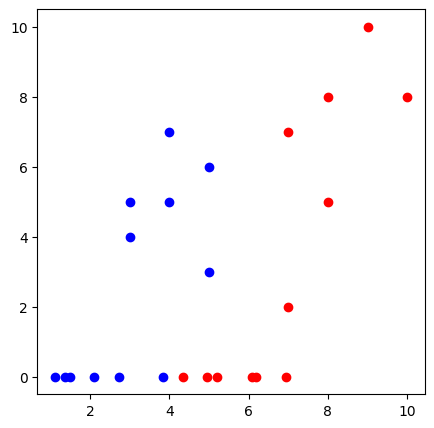

In [6]:
n1 = c1.shape[0]
n2 = c2.shape[0]
point_LDA1 = np.dot(c1, eigenvectors.T)
point_LDA2 = np.dot(c2, eigenvectors.T)

plt.figure(figsize=(5, 5))
# plotting the graph
plt.scatter(c1[:, 0], c1[:, 1], c = 'b')
# plot points of class 2
plt.scatter(c2[:, 0], c2[:, 1], c = 'r')
plt.scatter(point_LDA1[:,0],np.zeros(n1), c='b')
plt.scatter(point_LDA2[:,0],np.zeros(n2), c='r')

plt.show()

In [2]:
np.set_printoptions(precision=2)

mean_vectors = []
for cl in range(1,2):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

NameError: name 'X' is not defined